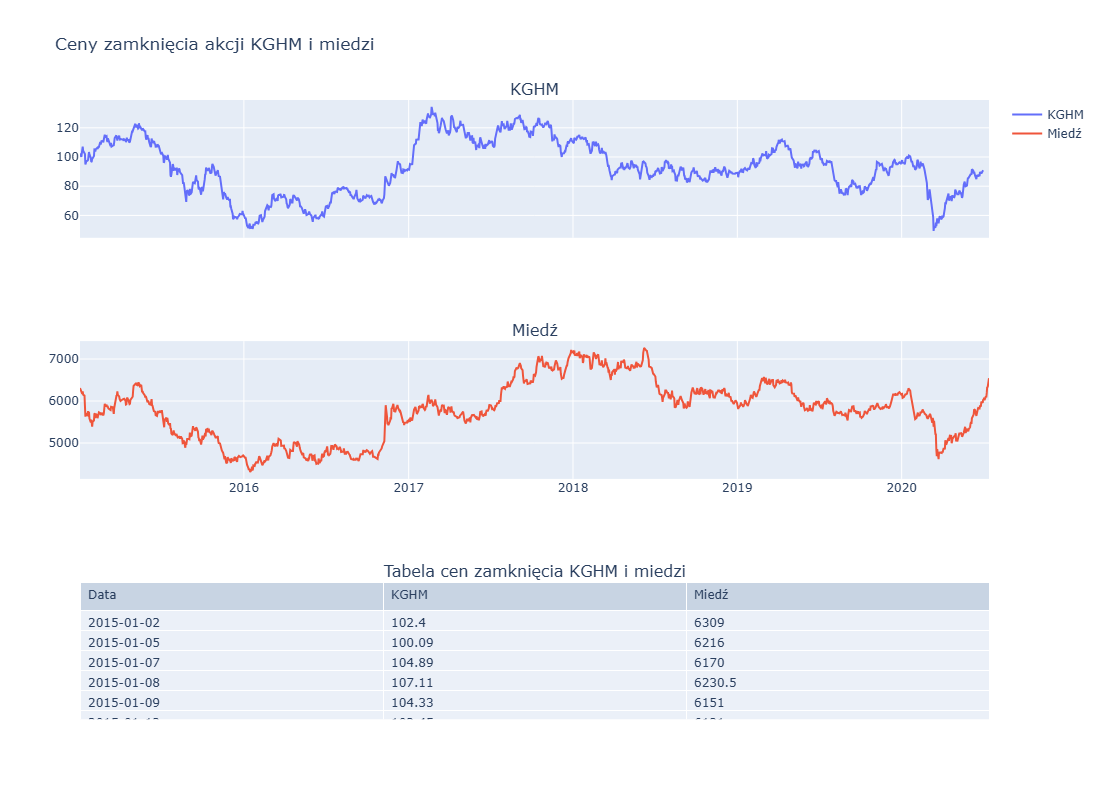

In [84]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Pobieranie danych
kghm_dane = pd.read_csv('kgh_d.csv')
miedz_ceny = pd.read_csv('ca_c_f_d.csv')


#Sprawdzenie i zmiana typów danych (data)
# kghm_dane.info()
# miedz_ceny.info()

kghm_dane['Data'] = pd.to_datetime(kghm_dane['Data'])
miedz_ceny['Data'] = pd.to_datetime(miedz_ceny['Data'])

# Łączenie danych na podstawie wspólnej kolumny "Data" do zrobienia tabeli
kghm_miedz_merge = pd.merge(kghm_dane[['Data', 'Zamkniecie']], miedz_ceny[['Data', 'Zamkniecie']], on='Data', how='inner')

# Tworzenie wykresów i tabeli
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    specs=[[{"type": "xy"}],  
           [{"type": "xy"}],  
           [{"type": "domain"}]],     subplot_titles=("KGHM", "Miedź", "Tabela cen zamknięcia KGHM i miedzi"))

fig.add_trace(
    go.Scatter(x=kghm_dane['Data'], y=kghm_dane['Zamkniecie'], mode='lines', name='KGHM'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=miedz_ceny['Data'], y=miedz_ceny['Zamkniecie'], mode='lines', name='Miedź'),
    row=2, col=1
)

tabela_dane = [
    kghm_miedz_merge['Data'].dt.strftime('%Y-%m-%d').tolist(), 
    kghm_miedz_merge['Zamkniecie_x'].tolist(), 
    kghm_miedz_merge['Zamkniecie_y'].tolist() 
]

fig.add_trace(
    go.Table(
        header=dict(values=['Data', 'KGHM', 'Miedź'], align='left'),
        cells=dict(values=tabela_dane,  align='left')
    ),
    row=3, col=1
)


fig.update_layout(
    height=800, 
    title_text="Ceny zamknięcia akcji KGHM i miedzi"
)

fig.show()
